# Introduction

For this notebook we will be addressing the technological and educational differences between data scientists and other kinds of developers. Only the data from 2020 Stack Overflow Survey was used. The dataset was filtered by selecting only the respondents that does any coding as part of their work  and also are effectively employed.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import os

sns.set(context='notebook', style='whitegrid', font_scale=1)

## Loading and filtering data

In [2]:
# loading the data selecting only columns related to 
# tecnolohical competencies or educational level and
# columns used for filtering and comparing results
# such as 'MainBranch', 'Employment' and 'DevType'
# also, respondent is loaded and used as the table index
data_folder = 'data'
file_path = os.path.join(data_folder, '2020_data.zip')

cols = ['Respondent', 'MainBranch', 'Employment', 'DevType',
        'UndergradMajor', 'EdLevel',
        'DatabaseDesireNextYear', 'DatabaseWorkedWith',
        'LanguageDesireNextYear', 'LanguageWorkedWith',
        'MiscTechDesireNextYear', 'MiscTechWorkedWith']

df = pd.read_csv(file_path, index_col='Respondent', usecols=cols)
df.head()

,MainBranch,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,UndergradMajor
Respondent,,,,,,,,,,,
1,I am a developer by profession,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,"Computer science, computer engineering, or sof..."
2,I am a developer by profession,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,"Computer science, computer engineering, or sof..."
3,I code primarily as a hobby,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN
4,I am a developer by profession,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,NaN,NaN,NaN,"Computer science, computer engineering, or sof..."
5,"I used to be a developer by profession, but no...",MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,Ansible;Chef,Ansible,"Computer science, computer engineering, or sof..."


In [3]:
# filtering the data

# professional coder filtering condition
professional_coder_options = ['I am a developer by profession',
                              'I am not primarily a developer, but I write code sometimes as part of my work']
professional_coders = df['MainBranch'].isin(professional_coder_options)

# empployed filtering conddition
employed_options = ['Independent contractor, freelancer, or self-employed',
                    'Employed full-time', 'Employed part-time']
employed = df['Employment'].isin(employed_options)

# both conditions
employed_coders = employed & professional_coders

# viewng the percentage of results
print(f'Percent of respondents selected: {employed_coders.mean():.2%}')

# filtering original data
df = df[employed_coders].copy()

Percent of respondents selected: 77.54%


# Data Scientists

After filtering the data, we must segment our data between data scientist and all the other developer types. First let’s look at the distribution of developer types. It is important to keep in mind that since it was possible to answer more than one type, the total sum of the percentages can be (and is) more than 100%.

In [4]:
def compute_cat_dist(cat_data: pd.Series, multi: bool) -> pd.Series:
    """Generate the distribution of valid responses in a categorical series. First,
    missing data is removed and then we get the number of valid values.
    If there is more than category per response we need to break the responses 
    and then reshape the data into a series with only one category per row.
    Finally we compute the category counts and then divide it by the series size.
    """
    
    cat_data.dropna(inplace=True)
    size = cat_data.shape[0]
    
    if multi:
        cat_data = cat_data.str.split(';').explode()
    
    return cat_data.value_counts().div(size)

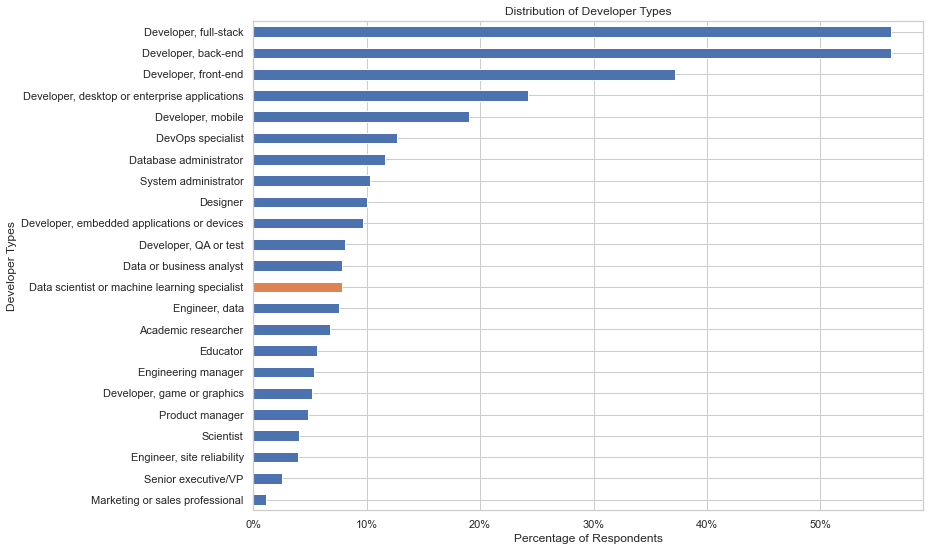

In [5]:
devtype_distr = compute_cat_dist(df['DevType'], True)

diff_index = 'Data scientist or machine learning specialist'
palette = sns.color_palette()
colors = [palette[1] if i == diff_index else palette[0] for i in devtype_distr.index]

ax = devtype_distr.plot(kind='barh', figsize=(12, 9), color=colors)
plt.gca().invert_yaxis()
ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.ylabel('Developer Types')
plt.xlabel('Percentage of Respondents')
plt.title('Distribution of Developer Types')
plt.show()

In [6]:
devtype_distr.head(3).mul(100).round(2)

Developer, full-stack    56.22
Developer, back-end      56.21
Developer, front-end     37.19
Name: DevType, dtype: float64

In [7]:
round(devtype_distr['Data scientist or machine learning specialist'] * 100, 2)

7.83

In [8]:
df.dropna(subset=['DevType'], inplace=True)
df['DataScience'] = df['DevType'].str.contains('Data scientist or machine learning specialist')

As expected, the great majority of respondents are developers. The three most common developer types are the most traditional ones: full-stack developer (56.22%), back-end developer (56.21%) and front-end developer (37.19%). Data scientists is only the 13th most common type, with only 7.83% developers.

# Comparisons

We will be comparing technological and educational competencies from data scientists and all the other developers. First, we will tackle the educational competencies. For that comparison two categorical variables will be selected, and their distributions will be compared, first the distribution of educational level and then the distribution of undergraduate majors. In both cases the differences of the distribution will be plotted in a bar graph.

For the technological competency’s comparisons, six variables were selected. Three types of technologies will be compared: programming language, databases and miscellaneous. Each of these types are divided into two more questions, what techs the respondent has worked with in 2020 and what techs they wanted to work with in 2021. Since for each question we have a lot of categories it is not feasible get the differences for each category in each question. Instead we will compare between data scientists and other developers the top-10 distribution for each question. The comparison will be grouped into questions related to techs worked with in 2020 and questions related to techs that the respondents want to work with in 2021.

In [9]:
def comparing_categoricals(data: pd.DataFrame, cat_var: str, multi=True):
    """This function is used to compare the distribution of categorical
    varable between the respondents tha are datascients with the other ones.
    This function works with multi category answers as well as single category ones.
    """
    
    # segmenting the data
    ds_cat_data = data.loc[data['DataScience'], cat_var].copy()
    ds_cat_dist = compute_cat_dist(ds_cat_data, multi).to_frame('Data Scientists')
    
    ot_cat_data = data.loc[~data['DataScience'], cat_var].copy()
    ot_cat_dist = compute_cat_dist(ot_cat_data, multi).rename('Others')
    
    cat_dist = ds_cat_dist.join(ot_cat_dist)
    cat_dist['Diff'] = cat_dist['Data Scientists'] - cat_dist['Others']
    return cat_dist

## Educational Level

Here we can see that data scientists usually have a higher level of formal education if compared to all the other developers. While most of the other developers (50.96%) have a bachelor's degree, only 34.23% of the data scientists have it. On the other hand, we have 41.11% data scientists with a master's degree while 24.52% of the other developers have it. At a smaller level that also happen with doctoral degrees, with 14.68% of data scientists having it while only 2.35% of the other developers have it.

In [10]:
edlevel_compare = comparing_categoricals(df, 'EdLevel', False)
edlevel_compare.mul(100).round(2).sort_values(by='Diff', ascending=False)

,Data Scientists,Others,Diff
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",41.11,24.52,16.60
"Other doctoral degree (Ph.D., Ed.D., etc.)",14.68,2.35,12.33
I never completed any formal education,0.75,0.57,0.17
Primary/elementary school,0.37,0.47,-0.09
"Professional degree (JD, MD, etc.)",1.15,1.47,-0.33
"Associate degree (A.A., A.S., etc.)",0.97,3.40,-2.43
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1.40,4.47,-3.06
Some college/university study without earning a degree,5.33,11.79,-6.46
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",34.23,50.96,-16.72


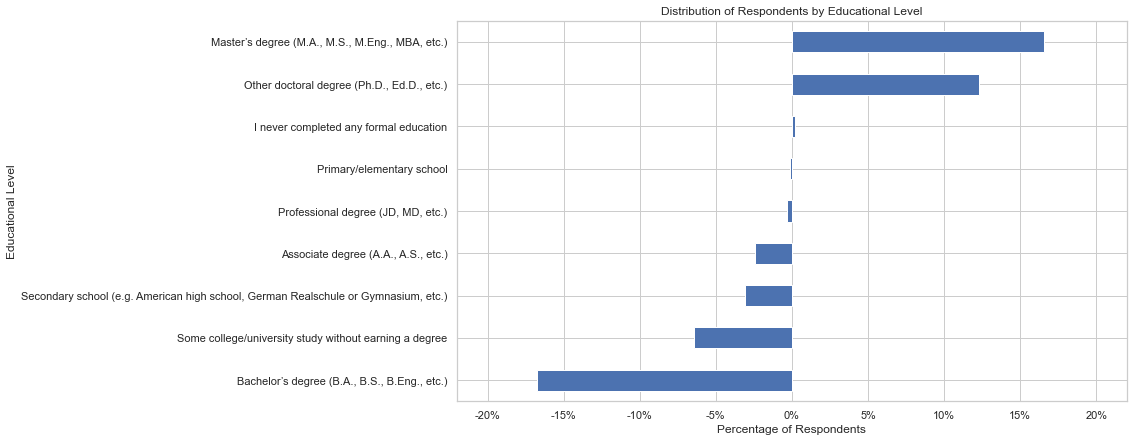

In [11]:
diffs = edlevel_compare['Diff']
ax = diffs.sort_values().plot(kind='barh', figsize=(12,7))
ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.xlim(-.22, .22)
plt.xlabel('Percentage of Respondents')
plt.ylabel('Educational Level')
plt.title('Distribution of Respondents by Educational Level')
plt.show()

## Undergraduate Majors

Most developers declared their majors in computer science, computer engineering or software engineering. Another popular option for developers is other kinds of engineering, such as civil, electrical, mechanical etc. Comparing Data Scientists with other developer we can see that data scientists have a more eclectic formation, such as mathematics (12.35%) and Natural Science (10.73%).

In [12]:
undergrad_compare = comparing_categoricals(df, 'UndergradMajor', False)
undergrad_compare.mul(100).round(2).sort_values(by='Diff', ascending=False)

,Data Scientists,Others,Diff
Mathematics or statistics,12.35,2.81,9.54
"A natural science (such as biology, chemistry, physics, etc.)",10.73,3.77,6.96
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",11.93,9.01,2.92
"A social science (such as anthropology, psychology, political science, etc.)",3.51,1.63,1.88
"A health science (such as nursing, pharmacy, radiology, etc.)",0.69,0.34,0.35
"A business discipline (such as accounting, finance, marketing, etc.)",2.85,2.54,0.31
I never declared a major,0.27,0.75,-0.48
"A humanities discipline (such as literature, history, philosophy, etc.)",1.32,2.09,-0.77
"Fine arts or performing arts (such as graphic design, music, studio art, etc.)",0.42,1.54,-1.12
Web development or web design,0.69,3.41,-2.72


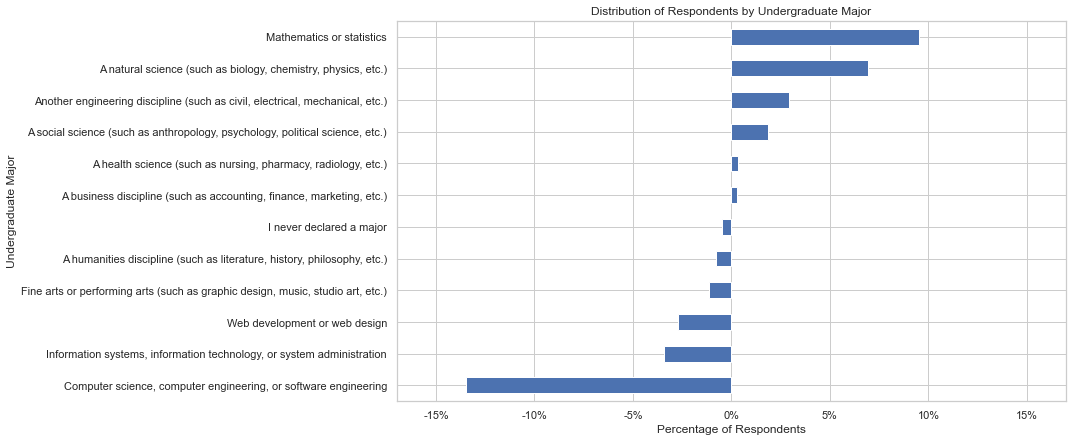

In [13]:
diffs = undergrad_compare['Diff']
ax = diffs.sort_values().plot(kind='barh', figsize=(12,7))
ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.xlim(-.17, .17)
plt.xlabel('Percentage of Respondents')
plt.ylabel('Undergraduate Major')
plt.title('Distribution of Respondents by Undergraduate Major')
plt.show()

## Technological Competencies

In [14]:
def get_percent_count(data, ds, col, topn):
    """Generate a dataframe with the relative distribution of the selected categorical question.
    Only the topn categories are returned. Also, it distinguish between datascientistis and others.
    """
    
    select = data['DataScience'] if ds else ~data['DataScience']
    
    selected_data = data.loc[select, col]
    
    result = compute_cat_dist(selected_data, True).sort_values(ascending=True).to_frame('percent').tail(topn)
    result['category'] = col
    result['DataScience'] = ds
    return result

In [15]:
def gen_col_list(worked):
    """Combine prefix and suffix of columns to generate desired column names
    based on the boolean that indicates if the selected columns are respective
    to techs that were worked with or techs that are desired to work with.
    """
    
    cols_prefix = ['Database', 'Language', 'MiscTech']
    sufix = 'WorkedWith' if worked else 'DesireNextYear'
    return [prefix + sufix for prefix in cols_prefix]

In [16]:
def tab_tech_comparison(data, worked, topn):    
    """Apply the percentual count for each variable selected based on the worked condition
    generate for each variable compute the percentual distribution of the topn categories.
    Make this for data scientists and other developers to. Concatenate all data into a 
    single dataset. Remap the variables in orther to make better labels for the plotting.
    Return the resulting dataframe.
    """
    
    col_list = gen_col_list(worked)
    
    data_list = []
    for ds in [True, False]:
        for col in col_list:
            data_list.append(get_percent_count(df, ds, col, topn))
    
    tech_data = pd.concat(data_list).reset_index()
    
    labels = ['Database', 'Language', 'Miscellaneous']
    cat_labeller = {col:label for col, label in zip(col_list, labels)}
    tech_data['category'] = tech_data['category'].map(cat_labeller)
    
    ds_labeller = {True: 'Data Scientist', False: 'Other Developers'}
    tech_data['DataScience'] = tech_data['DataScience'].map(ds_labeller)
    
    return tech_data

In [17]:
def plot_technical_comparison(plot_data, worked=True, topn=5):
    """Make a grid plot for each variable for each group of
    developers (data scientists and other developers). Use the data
    generated from tab_tech_comparison function.
    """
    
    gs = sns.FacetGrid(data=plot_data, col='category', row='DataScience',
                       sharey=False, aspect=1.5, margin_titles=True, height=4)
    gs.map(plt.barh, 'index', 'percent')
    for i, ax in enumerate(gs.axes.flat):
        ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
        ax.set_ylabel('')
        ax.set_xlim((0,1))
        if i > 2:
            ax.set_xlabel('Percent of Developers')
    gs.set_titles(row_template='{row_name}', col_template='{col_name}')
    gs.fig.subplots_adjust(top=0.87)
    title_complement = 'Worked With' if worked else 'Desired to Work With'
    title = f'Top-{topn} {title_complement} With Tools in 2020 for Data Scientists and Other Developers'
    gs.fig.suptitle(title, fontsize=20)
    plt.show()

Comparing top-10 technologies of Database, Language and Miscellaneous that data scientists and other developers worked with in 2020, we can observe great differences in the top languages and miscellaneous technologies between the two groups. For Data Scientists Python is like the golden standard, more than 80% use that language for their work. Even still being a popular language for other kind developers, the share of respondents that use python is not even half of the data scientists share. Miscellaneous techs look to be very dependent of the language used and like in the language case we can see a similar trend. Here for Data Scientists the top 3 miscellaneous techs are popular python packages for data science. Quite different from the top for the other developers.

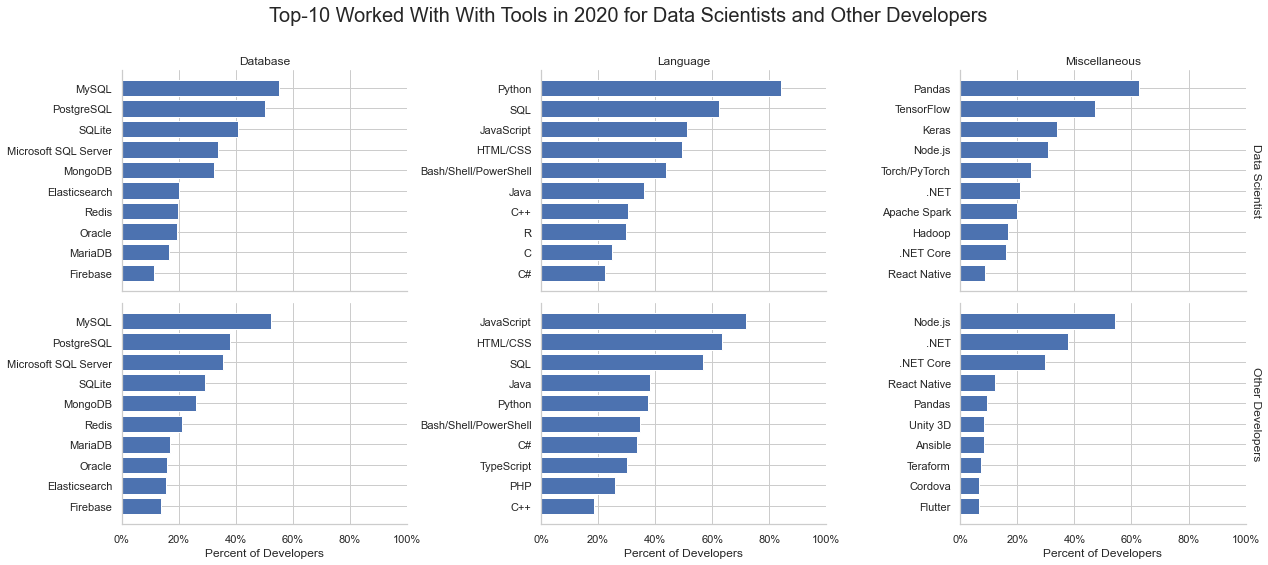

In [18]:
worked = True
topn = 10

worked_comparison = tab_tech_comparison(df, worked, topn)
plot_technical_comparison(worked_comparison, worked, topn)

The desired tech for data scientists and other developers show some similarities to the techs worked with distribution. The top three language for data scientists is the same. But here we can see a desire in data scientists to work with new languages, like 20% that want to work with Rust and 24% with Go. In the case of the other developers we see that despite not been a popular language to work with Python comes as the second most desired languages with more than 40% developers wanting to work with the language.

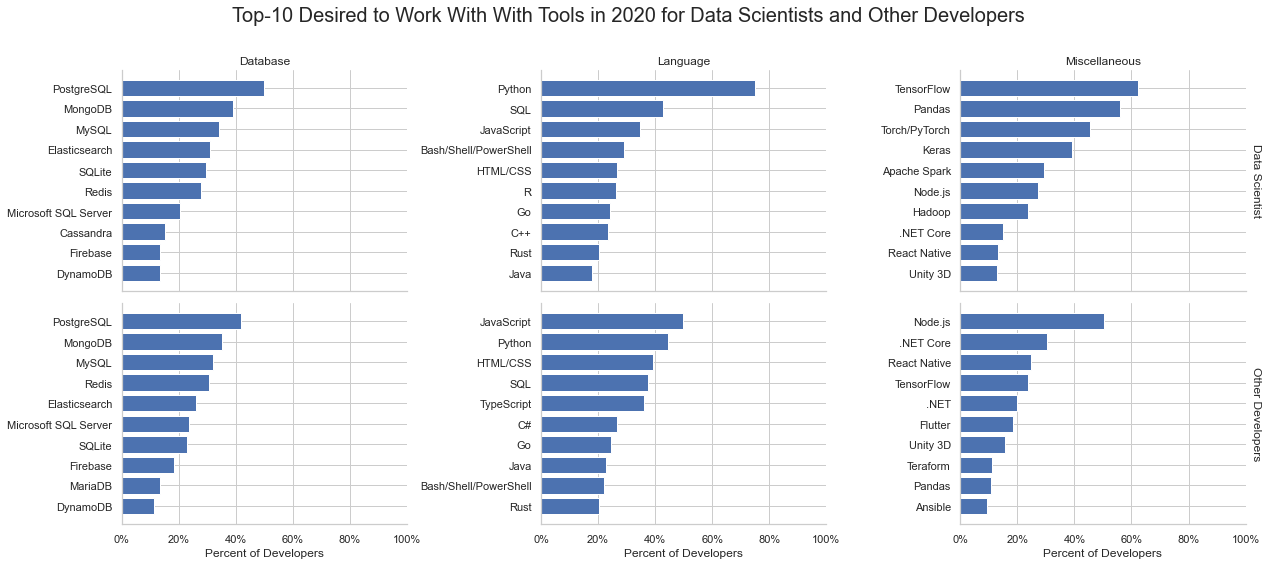

In [19]:
worked = False
topn = 10

desire_comparison = tab_tech_comparison(df, worked, topn)
plot_technical_comparison(desire_comparison, worked, topn)

# Technological Correlations

As a bonus here lets look at the correlations between the techological features. But here, instead of selecting both techs that respondents worked with and want to work, we will be narrowing our analysis to only those technologies that the respondents have worked with in 2020. Since we are dealing with correlation between two nominal variable we will be using the [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) correlation measure, an association measure that ranges from 0 to 1, with 1 being perfect correlation. Here we will be using the sample correction version of the coefficient formula.

In [20]:
def cramers_corrected_stat(x, y):
    """Compute the Cramér's V Correlation metric with sample corrections.
    https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    """
    contigency_tab = pd.crosstab(x, y)
    n = contigency_tab.sum().sum()
    r, k = contigency_tab.shape
    
    chi2 = ss.chi2_contingency(contigency_tab)[0]
    phi2 = chi2/n

    phi2corr = max(0, phi2 - (((k-1)*(r-1))/(n-1)))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min(kcorr-1, rcorr-1))

In [21]:
def multicategorical_dummy(df, col):
    """Transform a categorical variable into a dataframe of dummies
    generated from categories.
    """
    serie = df[col]
    serie = serie.str.split(';').explode()
    dummies_df = pd.get_dummies(serie).reset_index().groupby('Respondent').max()
    dummies_df.fillna(0, inplace=True)
    return dummies_df

In [22]:
def dummy_all(data):
    """apply the multicategorical_dummy to all columns of a given dataframe with
    only categorical variables. Each nominal variable has its data stored as a value of
    a dictionary with its corresponding key being the variable name
    """
    result = dict()
    for col in data.columns:
        dummies = multicategorical_dummy(data, col)
        result[col] = dummies
    return result

In [23]:
#worked with columns
worked_tech_cols = df.columns.str.endswith('WorkedWith')
tech_cols = df.columns[worked_tech_cols]

# selecting the data and removing missing observations
tech_df = df[tech_cols].copy().dropna()
tech_df.shape

(28434, 3)

In [24]:
# setting a threshold to show only the categories wich have
# a higher correlation. This is important since we have a great
# number of categories for each categorical variable.
threshold = .3
# dictionary of dummy dataframes
tech_cats = dummy_all(tech_df)

for var, data in tech_cats.items():
    tech_corr = data.corr(method=cramers_corrected_stat)
    corr_select = tech_corr.loc[(tech_corr > threshold).sum() > 1 ,(tech_corr > threshold).sum() > 1].round(2)
    
    print(var)
    print(corr_select)
    print('#'*100, '\n')

DatabaseWorkedWith
Empty DataFrame
Columns: []
Index: []
#################################################################################################### 

LanguageWorkedWith
             Assembly     C   C++  HTML/CSS  JavaScript  Objective-C  Swift
Assembly         1.00  0.37  0.29      0.04        0.02         0.11   0.07
C                0.37  1.00  0.56      0.04        0.00         0.14   0.08
C++              0.29  0.56  1.00      0.01        0.03         0.13   0.08
HTML/CSS         0.04  0.04  0.01      1.00        0.52         0.00   0.00
JavaScript       0.02  0.00  0.03      0.52        1.00         0.02   0.01
Objective-C      0.11  0.14  0.13      0.00        0.02         1.00   0.51
Swift            0.07  0.08  0.08      0.00        0.01         0.51   1.00
#################################################################################################### 

MiscTechWorkedWith
               .NET  .NET Core  Apache Spark  Hadoop  Keras  Pandas  \
.NET           1.00 

From the resul of the correlations matrix above, we can state some interesting points:
  1. Data base technologies are not correlated with each other
  2. Assembly is correlated with C and C++, while C and C++ are more correlated with each other.
  3. HTML/CSS and JavaScript are correlated with each other, wich might happen since both are complementar techs used into developing web apps.
  4. Pandas is correlated to a group of technologies used in data science: Hadoop, Keras, Tensorflow, Torch/PyTorch

In [25]:
ds_tech = df.loc[df['DataScience'] ,tech_cols].dropna().copy()
ds_tech.shape

(2503, 3)

In [26]:
# setting a threshold to show only the categories wich have
# a higher correlation. This is important since we have a great
# number of categories for each categorical variable.
threshold = .3
# dictionary of dummy dataframes
tech_cats = dummy_all(ds_tech)

for var, data in tech_cats.items():
    tech_corr = data.corr(method=cramers_corrected_stat)
    corr_select = tech_corr.loc[(tech_corr > threshold).sum() > 1 ,(tech_corr > threshold).sum() > 1].round(2)
    
    print(var)
    print(corr_select)
    print('#'*100, '\n')

DatabaseWorkedWith
Empty DataFrame
Columns: []
Index: []
#################################################################################################### 

LanguageWorkedWith
             Assembly     C   C++  HTML/CSS  JavaScript  Objective-C   PHP  \
Assembly         1.00  0.38  0.28      0.12        0.12         0.21  0.15   
C                0.38  1.00  0.56      0.16        0.14         0.22  0.17   
C++              0.28  0.56  1.00      0.10        0.11         0.18  0.15   
HTML/CSS         0.12  0.16  0.10      1.00        0.61         0.09  0.32   
JavaScript       0.12  0.14  0.11      0.61        1.00         0.11  0.28   
Objective-C      0.21  0.22  0.18      0.09        0.11         1.00  0.19   
PHP              0.15  0.17  0.15      0.32        0.28         0.19  1.00   
Swift            0.12  0.15  0.14      0.11        0.11         0.50  0.11   
TypeScript       0.10  0.10  0.07      0.25        0.32         0.13  0.18   

             Swift  TypeScript  
Assembl

When we narrow the correlation analysis to only the answers of data scientists, we some correlations been a little bit higher, such as Spark and Hadoop (0.49 versus 0.52) and Keras and TensorFlow (0.59 versus 0.61). Another important aspect is that pandas has not a higher correlation with any of the other miscellaneous technology.

# Conclusion

We can conclude in this analysis is that there are some sensible differences regarding technological aspects between data scientists and other developers. Those differences are much more evident in the miscellaneous technologies which are composed more specific kind of technologies.